<a href="https://colab.research.google.com/github/Reconocimiento-de-patrones-UNQ/Clases2a4/blob/main/ArbolesyRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de Decisión y Random Forests

Hasta ahora, hemos explorado modelos que buscan líneas o hiperplanos (Regresión Lineal/Logística, SVM) para separar o ajustar datos. Ahora, nos adentraremos en los Árboles de Decisión, un tipo de modelo completamente diferente que segmenta el espacio de características de forma jerárquica. Son intuitivos, fáciles de interpretar y forman la base de algoritmos más complejos como los Random Forests, que combinan el poder de muchos árboles para obtener predicciones aún más robustas.

Los Árboles de Decisión son modelos de Machine Learning que se asemejan a diagramas de flujo. Toman decisiones basadas en las características de entrada, dividiendo los datos en subconjuntos cada vez más pequeños hasta que los subconjuntos resultantes son lo suficientemente 'puros' como para hacer una predicción.

- Nodos (Nodes): Representan una condición o pregunta sobre una característica (ej. Edad > 50).
- Ramas (Branches): Conectan los nodos y representan el resultado de la condición.
- Hojas (Leaf Nodes): Son los nodos finales del árbol y representan la predicción (una clase para clasificación o un valor para regresión)

**Funcionamiento**:

El algoritmo de construcción de un árbol busca la característica y el valor de umbral que mejor dividen los datos en cada paso, maximizando la 'pureza' de los nodos resultantes. Para la clasificación, esta pureza se mide comúnmente con:

- **Impureza Gini (Gini Impurity)**: Mide la probabilidad de que un elemento elegido al azar de un nodo sea clasificado erróneamente si se le asigna una etiqueta al azar según la distribución de clases en ese nodo. Un Gini de 0 significa pureza total.
- **Entropía (Entropy)**: Mide el desorden o la incertidumbre de un nodo. Una entropía de 0 significa pureza total.

Para la regresión, el criterio suele ser la minimización del Error Cuadrático Medio (MSE) en cada nodo.

Precisión del Árbol de Decisión en el conjunto de prueba: 1.00



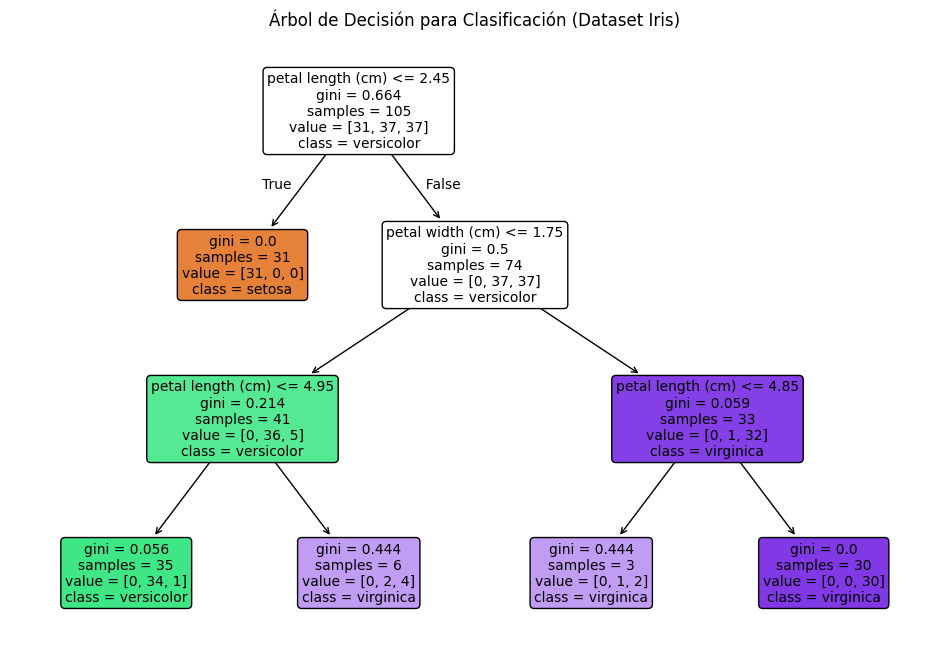


--- Interpretación del Árbol de Decisión ---
Cada nodo interno es una pregunta sobre una característica (ej., petal length (cm) <= 2.45).
Las ramas van a la izquierda si la condición es verdadera, a la derecha si es falsa.
El 'gini' mide la impureza del nodo (0 es puro).
Las hojas (nodos finales) tienen un Gini de 0, indicando que todos los ejemplos en esa hoja pertenecen a la misma clase (o casi todos).
'samples' indica cuántos ejemplos de entrenamiento cayeron en ese nodo.
'value' muestra la distribución de clases en el nodo (ej., [0, 50, 0] significa 0 de clase 0, 50 de clase 1, 0 de clase 2).
'class' es la clase predicha para ese nodo (la clase mayoritaria).


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Cargar el dataset Iris
iris = load_iris()
X_iris, y_iris = iris.data[:, 2:], iris.target # Usaremos solo la longitud y anchura del pétalo
feature_names_iris = iris.feature_names[2:]
target_names_iris = iris.target_names

# 2. Dividir los datos
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# 3. Entrenar un Árbol de Decisión para clasificación
# max_depth limita la profundidad del árbol para evitar overfitting en este ejemplo
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train_iris, y_train_iris)

# 4. Evaluar el modelo
y_pred_iris = tree_clf.predict(X_test_iris)
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
print(f"Precisión del Árbol de Decisión en el conjunto de prueba: {accuracy_iris:.2f}\n")

# 5. Visualizar el Árbol de Decisión
plt.figure(figsize=(12, 8))
plot_tree(tree_clf,
          feature_names=feature_names_iris,
          class_names=target_names_iris,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión para Clasificación (Dataset Iris)")
plt.show()

print("\n--- Interpretación del Árbol de Decisión ---")
print("Cada nodo interno es una pregunta sobre una característica (ej., petal length (cm) <= 2.45).")
print("Las ramas van a la izquierda si la condición es verdadera, a la derecha si es falsa.")
print("El 'gini' mide la impureza del nodo (0 es puro).")
print("Las hojas (nodos finales) tienen un Gini de 0, indicando que todos los ejemplos en esa hoja pertenecen a la misma clase (o casi todos).")
print("'samples' indica cuántos ejemplos de entrenamiento cayeron en ese nodo.")
print("'value' muestra la distribución de clases en el nodo (ej., [0, 50, 0] significa 0 de clase 0, 50 de clase 1, 0 de clase 2).")
print("'class' es la clase predicha para ese nodo (la clase mayoritaria).")

En este script, entrenamos un Árbol de Decisión para clasificar las especies de flores Iris.

Observa el gráfico del árbol. Cada nodo es una decisión binaria basada en una característica (longitud o anchura del pétalo).
Los nodos de hoja son donde se hace la predicción final de la especie.
El valor 'gini' en cada nodo indica cuán 'pura' es la mezcla de clases en ese punto. Un Gini de 0 significa que todos los ejemplos en ese nodo pertenecen a la misma clase.
max_depth es un hiperparámetro crucial para controlar la complejidad del árbol y prevenir el overfitting.

## Random Forests: Potenciando los Árboles de Decisión

Aunque los Árboles de Decisión son potentes y fáciles de interpretar, tienen una desventaja importante: son propensos al sobreajuste (overfitting), especialmente si no se limitan en profundidad. Pequeñas variaciones en los datos de entrenamiento pueden llevar a árboles de decisión muy diferentes, lo que los hace inestables (alta varianza).

Aquí es donde entran los **Random Forests**. Son un tipo de algoritmo de *Ensemble Learning* (aprendizaje de conjunto), que combina las predicciones de múltiples modelos para obtener un resultado más robusto y preciso.

El concepto clave detrás de Random Forests es Bagging (Bootstrap Aggregating):

1. Bootstrap: Se crean múltiples subconjuntos de datos de entrenamiento seleccionando aleatoriamente con reemplazo (bootstrap sampling) de los datos originales. Esto significa que algunos ejemplos pueden aparecer varias veces, y otros pueden no aparecer en un subconjunto dado.
2. Entrenamiento de Árboles: Un árbol de decisión diferente se entrena en cada uno de estos subconjuntos muestreados. Además, para cada división en un árbol, solo se consideran un subconjunto aleatorio de características. Esto aumenta la diversidad entre los árboles.
3. Agregación (Voting/Averaging):
- Para clasificación, Random Forest obtiene la predicción de cada árbol y la clase más votada es la predicción final.
- Para regresión, Random Forest promedia las predicciones de todos los árboles.
Al combinar las predicciones de muchos árboles ligeramente diferentes y que a menudo se compensan entre sí, los Random Forests reducen la varianza y el overfitting, mejorando significativamente la generalización y la robustez del modelo.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Cargar el dataset Iris (mismo que Ejercicio 1)
iris = load_iris()
X_iris, y_iris = iris.data, iris.target # Usamos todas las características ahora

# 2. Dividir los datos
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# 3. Entrenar un Random Forest Classifier
# n_estimators: número de árboles en el bosque
# max_features: número de características a considerar para cada split (randomness)
# max_depth: profundidad máxima de cada árbol (para evitar que un solo árbol sea demasiado complejo)
rf_clf = RandomForestClassifier(n_estimators=50, max_features="sqrt", max_depth=4, random_state=42)
rf_clf.fit(X_train_iris, y_train_iris)

# 4. Evaluar el modelo
y_pred_rf = rf_clf.predict(X_test_iris)
accuracy_rf = accuracy_score(y_test_iris, y_pred_rf)
print(f"Precisión del Random Forest en el conjunto de prueba: {accuracy_rf:.2f}")

# (Opcional) Comparar con un solo árbol profundo para ver la diferencia de overfitting
tree_deep = DecisionTreeClassifier(random_state=42) # Sin límite de profundidad
tree_deep.fit(X_train_iris, y_train_iris)
accuracy_train_deep = accuracy_score(y_train_iris, tree_deep.predict(X_train_iris))
accuracy_test_deep = accuracy_score(y_test_iris, tree_deep.predict(X_test_iris))
print(f"Precisión (Train) de un Árbol Profundo: {accuracy_train_deep:.2f}")
print(f"Precisión (Test) de un Árbol Profundo: {accuracy_test_deep:.2f}\n")


print("\n--- Poder del Random Forest ---")
print("Observa cómo la precisión del Random Forest en el conjunto de prueba suele ser")
print("superior o más estable que la de un solo árbol de decisión (especialmente uno sin poda).")
print("Esto se debe a que Random Forest combina las predicciones de muchos árboles,")
print("compensando los errores individuales y reduciendo el sobreajuste.")

Precisión del Random Forest en el conjunto de prueba: 1.00
Precisión (Train) de un Árbol Profundo: 1.00
Precisión (Test) de un Árbol Profundo: 1.00


--- Poder del Random Forest ---
Observa cómo la precisión del Random Forest en el conjunto de prueba suele ser
superior o más estable que la de un solo árbol de decisión (especialmente uno sin poda).
Esto se debe a que Random Forest combina las predicciones de muchos árboles,
compensando los errores individuales y reduciendo el sobreajuste.


En este script, entrenamos un Random Forest en el dataset Iris.

*n_estimators* define cuántos árboles individuales se entrenarán en el bosque. Más árboles generalmente significan mejor rendimiento, pero a expensas del tiempo de cómputo.
*max_features* y *max_depth* son cruciales para controlar la complejidad de los árboles individuales y la diversidad dentro del bosque.
Compara la precisión del Random Forest con la de un solo Árbol de Decisión.

### Demostración del Clasificador Random Forest y sus Hiperparámetros
Ahora vamos a hacer la ultima demostración, donde exploraremos cómo funciona el Random Forest, cómo se evalúa y cómo diferentes hiperparámetros afectan su rendimiento en el dataset make moons

El dataset 'make_moons' genera dos conjuntos de puntos entrelazados en forma de media luna.
Es un ejemplo clásico en Machine Learning porque no es linealmente separable y, al añadirle ruido, se convierte en un desafío ideal para demostrar cómo algunos modelos (como un solo árbol profundo) "pueden sobreajustar fácilmente al ruido en los datos de entrenamiento, mientras que otros (como Random Forest) logran generalizar mejor a datos nuevos.


--- Demostración del Clasificador Random Forest y sus Hiperparámetros ---
En esta demostración, usaremos un dataset sintético ('make_moons') con ruido
para ilustrar cómo el Random Forest ayuda a evitar el sobreajuste y mejora la generalización,
comparado con un solo Árbol de Decisión profundo.



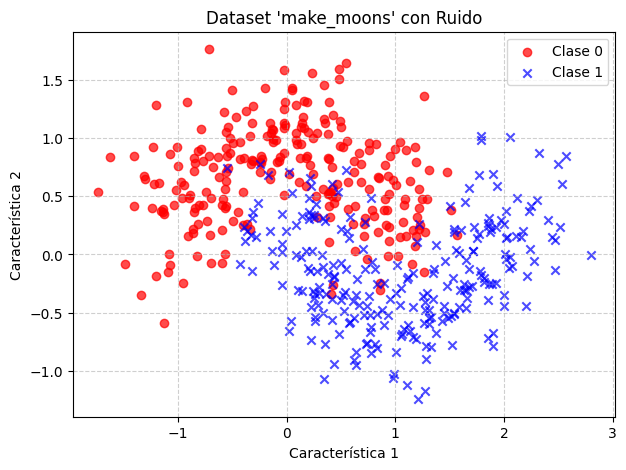

Este es el dataset que vamos a clasificar. Como pueden ver, las dos 'lunas' están mezcladas con ruido,
lo que hace la tarea más desafiante y propensa al sobreajuste si el modelo es demasiado complejo.

--- 2. Modelo Base de Random Forest (n_estimators=100, max_depth=None/auto) ---
Entrenaremos un Random Forest con un número razonable de árboles (100). Aquí, max_depth=None
significa que los árboles individuales crecerán sin límite, pero la combinación y aleatoriedad del bosque
ayudará a prevenir el sobreajuste general en el conjunto de prueba, a pesar de que los árboles individuales sean profundos.

Precisión del Random Forest BASE en el conjunto de ENTRENAMIENTO: 1.0000
Precisión del Random Forest BASE en el conjunto de PRUEBA: 0.8900
OOB (Out-of-Bag) Score del Random Forest BASE: 0.8975

--- 3. Comparación: Un solo Árbol de Decisión PROFUNDO ---
Un árbol de decisión 'profundo' (sin limitación de max_depth o con un valor muy alto)
tiende a aprender el ruido en los datos de entrenamient

<ipython-input-22-1884804693>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis') # Usar feature_names definidos


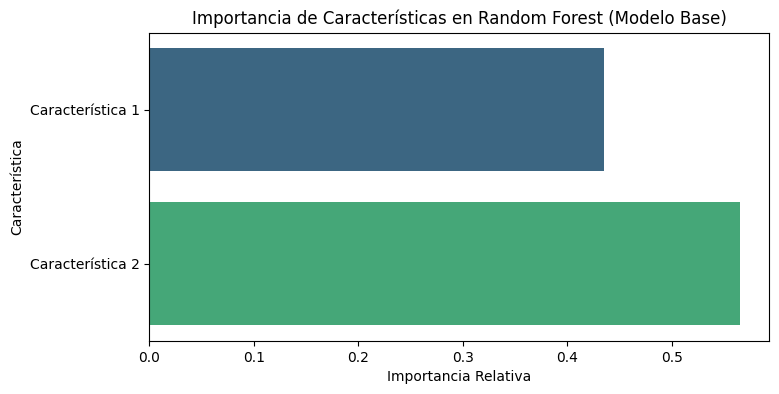

Este gráfico muestra la contribución relativa de cada una de las dos características
sintéticas en las decisiones del Random Forest. En este caso, ambas características
suelen ser igualmente importantes para definir la forma de 'luna'.


--- 5. Variación del Hiperparámetro: n_estimators (Número de Árboles) ---
Aumentar el número de árboles en el bosque generalmente mejora la precisión
y la estabilidad del modelo, pero con rendimientos decrecientes y un mayor costo computacional.
Veremos cómo la precisión en prueba tiende a estabilizarse.



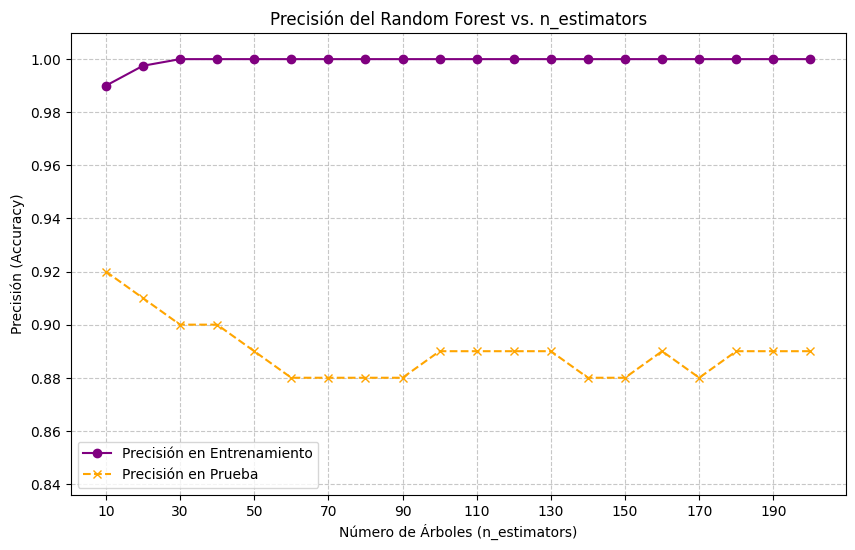

Este gráfico ilustra cómo a medida que añadimos más árboles, la precisión en entrenamiento se acerca a 1.0,
mientras que la precisión en prueba mejora y luego se estabiliza. Más allá de cierto punto,
añadir más árboles no mejora mucho el rendimiento, solo aumenta el tiempo de entrenamiento.
Esto demuestra la ley de los rendimientos decrecientes.


--- 6. Variación del Hiperparámetro: max_depth (Profundidad Máxima) ---
Este hiperparámetro es crucial para controlar el sobreajuste de los árboles individuales.
Si es muy bajo, los árboles pueden subajustar (demasiado simple). Si es muy alto, los árboles individuales
pueden sobreajustar al ruido, aunque el Random Forest aún podría compensarlo hasta cierto punto.


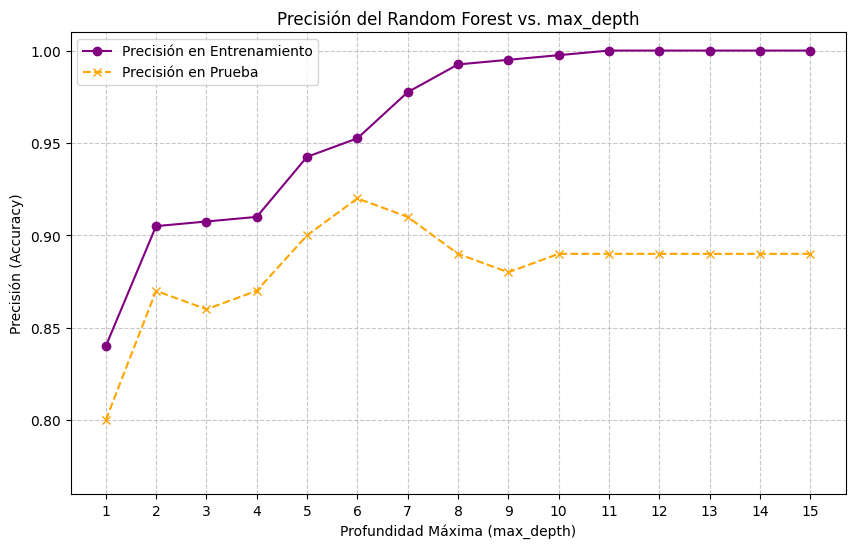

Este gráfico nos muestra cómo la precisión en entrenamiento y prueba se ven afectadas por la profundidad.
Demasiado poca profundidad (max_depth=1 o 2) puede llevar a subajuste (el modelo es demasiado simple).
A medida que aumenta la profundidad, la precisión en entrenamiento sube rápidamente (potencialmente a 1.0),
mientras que la de prueba también mejora hasta un punto óptimo y luego puede empezar a estabilizarse o
disminuir si los árboles individuales empiezan a captar demasiado ruido del conjunto de entrenamiento.


--- 7. Visualización: Matriz de Confusión del Modelo Base ---
La matriz de confusión nos ayuda a entender los tipos de errores que comete el clasificador.
Nos muestra cuántas predicciones fueron verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.



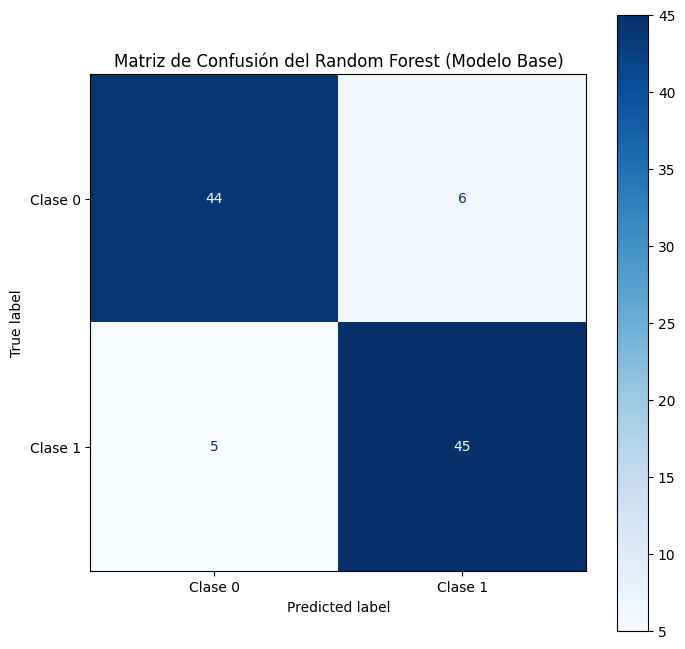

En esta matriz, la fila representa la clase real y la columna la clase predicha.
Los números en la diagonal (arriba izquierda a abajo derecha) son las predicciones correctas.
Los números fuera de la diagonal son los errores de clasificación: el modelo predijo una clase,
pero la real era otra. Por ejemplo, si hay un valor en la primera fila, segunda columna,
significa que se predijo 'Clase 1' cuando la real era 'Clase 0'.


--- Conclusión General ---
Al cambiar a un dataset más complejo y ruidoso como 'make_moons', hemos podido
demostrar claramente cómo Random Forest supera el sobreajuste que un solo Árbol de Decisión profundo
puede sufrir. La combinación de múltiples árboles y la aleatoriedad en su construcción
permite que Random Forest capture patrones complejos en los datos sin memorizar el ruido,
lo que resulta en una mejor capacidad de generalización y, por ende, una mayor precisión en el conjunto de prueba.
¡Espero que esta demostración más vívida les sea de gran ayuda!


In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons # ¡Cambiado a make_moons!
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Necesario para la comparación con un solo árbol
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns # Para gráficos más bonitos

# --- 1. Cargar un dataset más complejo y ruidoso: make_moons ---
# Este dataset es ideal para demostrar el overfitting de un solo árbol
# y la capacidad de generalización de Random Forest.
# 'n_samples': número total de puntos (aumentado para más datos)
# 'noise': cantidad de ruido añadido a los datos (crucial para el sobreajuste)
# 'random_state': para reproducibilidad
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# Las características no tienen nombres genéricos aquí, podemos omitir feature_names o crear unos simples
feature_names = ['Característica 1', 'Característica 2'] # Nombres genéricos para las dos características

# 2. Dividir los datos
# Usamos un test_size estándar del 30%. El ruido en los datos hará que la precisión no sea 1.0,
# lo que permite observar mejor el rendimiento relativo.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # Usamos X, y en lugar de X_iris, y_iris
)

print("--- Demostración del Clasificador Random Forest y sus Hiperparámetros ---")
print("En esta demostración, usaremos un dataset sintético ('make_moons') con ruido")
print("para ilustrar cómo el Random Forest ayuda a evitar el sobreajuste y mejora la generalización,")
print("comparado con un solo Árbol de Decisión profundo.\n")

# --- Visualización del Dataset (¡Nuevo y útil!) ---
plt.figure(figsize=(7, 5))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Clase 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Clase 1', alpha=0.7)
plt.title("Dataset 'make_moons' con Ruido")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print("Este es el dataset que vamos a clasificar. Como pueden ver, las dos 'lunas' están mezcladas con ruido,")
print("lo que hace la tarea más desafiante y propensa al sobreajuste si el modelo es demasiado complejo.\n")


# --- Modelo Base de Random Forest ---
print("--- 2. Modelo Base de Random Forest (n_estimators=100, max_depth=None/auto) ---")
print("Entrenaremos un Random Forest con un número razonable de árboles (100). Aquí, max_depth=None")
print("significa que los árboles individuales crecerán sin límite, pero la combinación y aleatoriedad del bosque")
print("ayudará a prevenir el sobreajuste general en el conjunto de prueba, a pesar de que los árboles individuales sean profundos.\n")
rf_clf_base = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=42, oob_score=True, n_jobs=-1)
rf_clf_base.fit(X_train, y_train) # Usamos X_train, y_train del nuevo dataset

y_pred_train_base = rf_clf_base.predict(X_train)
accuracy_train_base = accuracy_score(y_train, y_pred_train_base)
y_pred_test_base = rf_clf_base.predict(X_test)
accuracy_test_base = accuracy_score(y_test, y_pred_test_base)

print(f"Precisión del Random Forest BASE en el conjunto de ENTRENAMIENTO: {accuracy_train_base:.4f}")
print(f"Precisión del Random Forest BASE en el conjunto de PRUEBA: {accuracy_test_base:.4f}")
print(f"OOB (Out-of-Bag) Score del Random Forest BASE: {rf_clf_base.oob_score_:.4f}") # OOB score es una estimación de generalización

# --- Comparar con un solo Árbol de Decisión Profundo ---
print("\n--- 3. Comparación: Un solo Árbol de Decisión PROFUNDO ---")
print("Un árbol de decisión 'profundo' (sin limitación de max_depth o con un valor muy alto)")
print("tiende a aprender el ruido en los datos de entrenamiento, lo que lleva a un **sobreajuste**.")
print("Veremos una precisión de entrenamiento muy alta, pero una precisión notablemente menor en prueba.\n")
tree_deep = DecisionTreeClassifier(random_state=42) # Sin límite de profundidad
tree_deep.fit(X_train, y_train) # Usamos X_train, y_train del nuevo dataset
accuracy_train_deep = accuracy_score(y_train, tree_deep.predict(X_train))
accuracy_test_deep = accuracy_score(y_test, tree_deep.predict(X_test))

print(f"Precisión (Train) de un Árbol Profundo: {accuracy_train_deep:.4f}")
print(f"Precisión (Test) de un Árbol Profundo: {accuracy_test_deep:.4f}\n")

print("--- ¡Observa la diferencia CRÍTICA! ---")
print("Aquí es donde se ve el beneficio del Random Forest:")
print(f"Random Forest (Precisión en Prueba): {accuracy_test_base:.4f}")
print(f"Árbol Profundo (Precisión en Prueba): {accuracy_test_deep:.4f}")
print("El Árbol Profundo muestra una precisión de entrenamiento muy alta (cercana a 1.0),")
print("pero su precisión en el conjunto de PRUEBA es significativamente más baja que la del Random Forest.")
print("Esto es un claro indicio de **sobreajuste** por parte del árbol individual.")
print("Random Forest, al combinar muchos árboles, cada uno entrenado con una muestra diferente")
print("de los datos y usando un subconjunto aleatorio de características, compensa los errores")
print("individuales y generaliza mucho mejor a datos no vistos, logrando mayor precisión en el test set.")


# --- Visualización 1: Importancia de Características (para el Random Forest) ---
print("\n--- 4. Visualización: Importancia de las Características (Random Forest) ---")
print("Aunque nuestro dataset sintético tiene solo 2 características, Random Forest")
print("puede indicar su importancia relativa en la toma de decisiones.\n")
plt.figure(figsize=(8, 4))
importances = rf_clf_base.feature_importances_
# Para make_moons, solo hay 2 características
sns.barplot(x=importances, y=feature_names, palette='viridis') # Usar feature_names definidos
plt.title("Importancia de Características en Random Forest (Modelo Base)")
plt.xlabel("Importancia Relativa")
plt.ylabel("Característica")
plt.show()
print("Este gráfico muestra la contribución relativa de cada una de las dos características")
print("sintéticas en las decisiones del Random Forest. En este caso, ambas características")
print("suelen ser igualmente importantes para definir la forma de 'luna'.\n")


# --- Visualización 2: Efecto de n_estimators (Número de Árboles) ---
print("\n--- 5. Variación del Hiperparámetro: n_estimators (Número de Árboles) ---")
print("Aumentar el número de árboles en el bosque generalmente mejora la precisión")
print("y la estabilidad del modelo, pero con rendimientos decrecientes y un mayor costo computacional.")
print("Veremos cómo la precisión en prueba tiende a estabilizarse.\n")
n_estimators_range = range(10, 201, 10) # Desde 10 hasta 200, de 10 en 10
accuracies_n_est_train = []
accuracies_n_est_test = []

for n_est in n_estimators_range:
    # Usamos X_train, y_train, X_test, y_test del nuevo dataset
    rf_clf_temp = RandomForestClassifier(n_estimators=n_est, max_features="sqrt", random_state=42, n_jobs=-1)
    rf_clf_temp.fit(X_train, y_train)
    accuracies_n_est_train.append(accuracy_score(y_train, rf_clf_temp.predict(X_train)))
    accuracies_n_est_test.append(accuracy_score(y_test, rf_clf_temp.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies_n_est_train, marker='o', linestyle='-', color='purple', label='Precisión en Entrenamiento')
plt.plot(n_estimators_range, accuracies_n_est_test, marker='x', linestyle='--', color='orange', label='Precisión en Prueba')
plt.title("Precisión del Random Forest vs. n_estimators")
plt.xlabel("Número de Árboles (n_estimators)")
plt.ylabel("Precisión (Accuracy)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(10, 201, 20))
plt.legend()
plt.ylim(min(accuracies_n_est_test) * 0.95, 1.01) # Ajustar límites para mejor visualización del rango de make_moons
plt.show()
print("Este gráfico ilustra cómo a medida que añadimos más árboles, la precisión en entrenamiento se acerca a 1.0,")
print("mientras que la precisión en prueba mejora y luego se estabiliza. Más allá de cierto punto,")
print("añadir más árboles no mejora mucho el rendimiento, solo aumenta el tiempo de entrenamiento.")
print("Esto demuestra la ley de los rendimientos decrecientes.\n")


# --- Visualización 3: Efecto de max_depth (Profundidad Máxima de los Árboles) ---
print("\n--- 6. Variación del Hiperparámetro: max_depth (Profundidad Máxima) ---")
print("Este hiperparámetro es crucial para controlar el sobreajuste de los árboles individuales.")
print("Si es muy bajo, los árboles pueden subajustar (demasiado simple). Si es muy alto, los árboles individuales")
print("pueden sobreajustar al ruido, aunque el Random Forest aún podría compensarlo hasta cierto punto.")
max_depth_range = range(1, 16) # Desde profundidad 1 hasta 15
accuracies_max_depth_train = []
accuracies_max_depth_test = []

for depth in max_depth_range:
    # Usamos X_train, y_train, X_test, y_test del nuevo dataset
    rf_clf_temp = RandomForestClassifier(n_estimators=100, max_features="sqrt", max_depth=depth, random_state=42, n_jobs=-1)
    rf_clf_temp.fit(X_train, y_train)
    accuracies_max_depth_train.append(accuracy_score(y_train, rf_clf_temp.predict(X_train)))
    accuracies_max_depth_test.append(accuracy_score(y_test, rf_clf_temp.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, accuracies_max_depth_train, marker='o', linestyle='-', color='purple', label='Precisión en Entrenamiento')
plt.plot(max_depth_range, accuracies_max_depth_test, marker='x', linestyle='--', color='orange', label='Precisión en Prueba')
plt.title("Precisión del Random Forest vs. max_depth")
plt.xlabel("Profundidad Máxima (max_depth)")
plt.ylabel("Precisión (Accuracy)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(max_depth_range)
plt.legend()
plt.ylim(min(accuracies_max_depth_test) * 0.95, 1.01) # Ajustar límites para make_moons
plt.show()
print("Este gráfico nos muestra cómo la precisión en entrenamiento y prueba se ven afectadas por la profundidad.")
print("Demasiado poca profundidad (max_depth=1 o 2) puede llevar a subajuste (el modelo es demasiado simple).")
print("A medida que aumenta la profundidad, la precisión en entrenamiento sube rápidamente (potencialmente a 1.0),")
print("mientras que la de prueba también mejora hasta un punto óptimo y luego puede empezar a estabilizarse o")
print("disminuir si los árboles individuales empiezan a captar demasiado ruido del conjunto de entrenamiento.\n")


# --- Visualización 4: Matriz de Confusión (para el modelo base) ---
print("\n--- 7. Visualización: Matriz de Confusión del Modelo Base ---")
print("La matriz de confusión nos ayuda a entender los tipos de errores que comete el clasificador.")
print("Nos muestra cuántas predicciones fueron verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.\n")
cm = confusion_matrix(y_test, y_pred_test_base) # Usamos y_test y y_pred_test_base del nuevo dataset
class_names = ['Clase 0', 'Clase 1'] # Nombres genéricos para las clases binarias de make_moons
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Matriz de Confusión del Random Forest (Modelo Base)")
plt.show()
print("En esta matriz, la fila representa la clase real y la columna la clase predicha.")
print("Los números en la diagonal (arriba izquierda a abajo derecha) son las predicciones correctas.")
print("Los números fuera de la diagonal son los errores de clasificación: el modelo predijo una clase,")
print("pero la real era otra. Por ejemplo, si hay un valor en la primera fila, segunda columna,")
print("significa que se predijo 'Clase 1' cuando la real era 'Clase 0'.\n")


Esta demostración ilustra el poder del Random Forest para lograr alta precisión y reducir el sobreajuste
al combinar la sabiduría de múltiples árboles de decisión. Además, muestra la importancia de entender
y ajustar los hiperparámetros para optimizar el rendimiento del modelo en diferentes escenarios.
La clave de su éxito radica en la combinación de múltiples árboles (cada uno entrenado con una muestra aleatoria de datos y características), lo que reduce la varianza y mejora la capacidad del modelo para generalizar patrones reales en lugar de memorizar el ruido.
Además, hemos explorado cómo el ajuste de hiperparámetros como `n_estimators` (número de árboles) y `max_depth` (profundidad máxima) es fundamental para optimizar el rendimiento y la robustez del modelo.
En resumen, Random Forest es una herramienta robusta y efectiva para problemas de clasificación y regresión, especialmente útil cuando se busca un equilibrio entre alta precisión y prevención del sobreajuste.